# Experiment 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import json

class data_storage:
    b = np.array([]);
    l = np.array([]);
    t = np.array([]);
    v = np.array([]);
    d = np.array([]);
    g = np.array([]);
    s = np.array([]);
    c = np.array([]);

def extract_data( TXTpath ):
    X = data_storage()
    Cb = 0;
    Ct = 0;
    with open(TXTpath) as f:
        line = f.readline()
        while line:
            line = f.readline()
            if( line[0:2] == ".b" ):
                Cb+=1;
                X.b = np.append(X.b, int(line[2:]))
            if( line[0:2] == ".g" ):
                X.g = np.append(X.g, int(line[3:]))        
            if( line[0:2] == ".s" ):
                X.s = np.append(X.s, int(line[3:]))
            if( line[0:2] == ".c" ):
                X.c = np.append(X.c, float(line[3:]))
            if( line[0:2] == ".d" ):
                X.d = np.append(X.d, int(line[3:]))
            if( line[0:2] == ".l" ):
                X.l = np.append(X.l,float(line[3:]))
            if( line[0:2] == ".t" ):
                Ct+=1;
                X.t = np.append(X.t,float(line[3:]))
                if( Cb != Ct ):
                    print(X.b[Cb-1])
            if( line[0:2] == ".v" ):
                X.v = np.append(X.v,float(line[3:]))
            
    return X
    
D0 = extract_data( 'muesli/RES/summary.txt' )
D1 = extract_data( 'ixtsdec2/RES/summary.txt' )
D2 = extract_data( 'armuesli/RES/summary.txt' )
D3 = extract_data( 'argmuesli/RES/summary.txt' )
D4 = extract_data( 'forestmuesli/RES/summary.txt' )
D5 = extract_data( 'forestmuesli5/RES/summary.txt' )

f = open ('muesli/muesli.json', "r")
D0j = json.loads(f.read())

f = open ('ixtsdec2/ixtsdec2.json', "r")
D1j = json.loads(f.read())

f = open ('armuesli/armuesli.json', "r")
D2j = json.loads(f.read())

f = open ('argmuesli/argmuesli.json', "r")
D3j = json.loads(f.read())

f = open ('forestmuesli/forestmuesli.json', "r")
D4j = json.loads(f.read())

f = open ('forestmuesli5/forestmuesli5.json', "r")
D5j = json.loads(f.read())

D0r = [D0j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D1r = [D1j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D2r = [D2j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D3r = [D3j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D4r = [D4j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D5r = [D5j[0]["entries"][j]["runtime"] for j in range(0,99,1)]


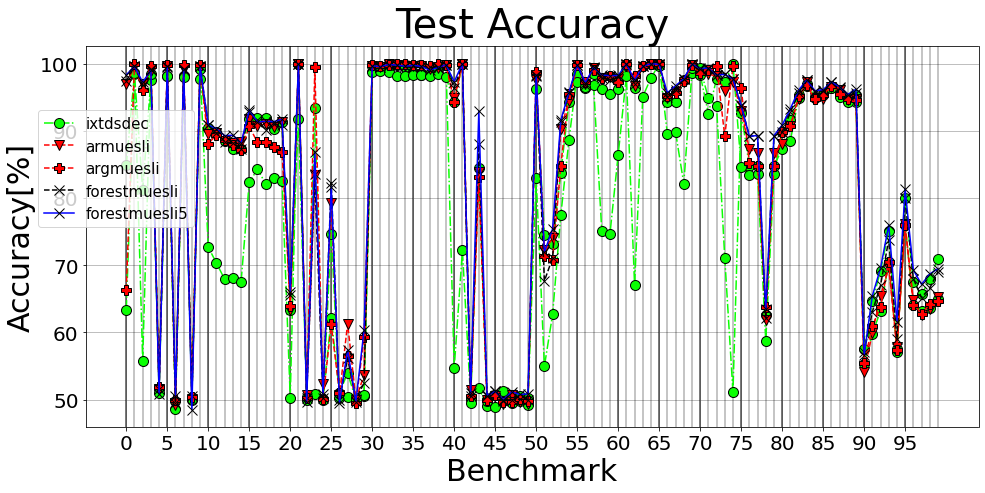

In [7]:
#import matplotlib.font_manager

fig = plt.figure(figsize=(16,7))
ax = plt.gca()
plt.xticks(range(0,100,5), fontsize=50)
for b in range(0,100,1):
    plt.axvline(x=b, color='k', alpha = 0.3)
for b in range(0,100,5):
    plt.axvline(x=b, color='k', alpha = 0.5)
plt.grid()
#lineSD, = ax.plot(SD.b, SD.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
#lineISD, = ax.plot(ISD.b, ISD.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ISD')
#lineIDSD, = ax.plot(IDSD.b, IDSD.t, 'o', c='white', alpha=1, markeredgecolor='k', markersize = 16, label = 'IDSD')
#linearMUESLI, = ax.plot(arMUESLI.b, arMUESLI.t, '*', c='red', alpha=1, markeredgecolor='k', markersize = 15, label = 'arMUESLI')
#linedcIDSD, = ax.plot(dcIDSD.b, dcIDSD.t, 'P', c='k', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')
#lineRASS, = ax.plot(rass.b, rass.t, 'o', c='gold', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')

line0, = ax.plot(D0.b, D0.t , '-.o', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 10, label = 'muesli')
line1, = ax.plot(D1.b, D1.t , '-.o', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 10, label = 'ixtdsdec')
line2, = ax.plot(D2.b, D2.t , '--v', c='r', alpha=1, markeredgecolor='k', markersize = 10 , label = 'armuesli')
line3, = ax.plot(D3.b, D3.t , '--P', c='r', alpha=1, markeredgecolor='k', markersize = 10 , label = 'argmuesli')
line4, = ax.plot(D4.b, D4.t , '--x', c='k', alpha=1, markeredgecolor='k', markersize = 10 , label = 'forestmuesli')
line5, = ax.plot(D5.b, D5.t , '-x', c='blue', alpha=1, markeredgecolor='k', markersize = 10 , label = 'forestmuesli5')

ax.legend( handles = [line1, line2, line3, line4, line5], fontsize=15, bbox_to_anchor=(0.09, 0.75, 0.04, .102)) #,

plt.rcParams["font.family"] = "sans"
plt.xlabel('Benchmark', fontsize=30)
plt.ylabel('Accuracy[%]', fontsize=30)
plt.title('Test Accuracy', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('acc.png')

In [8]:
from tabulate import tabulate
def extract_row_data( X, runtime, label ):
    return [label, np.mean(X.l),np.mean(X.t), np.mean(X.g), np.mean(X.d), np.mean(X.v-X.t), np.mean(runtime)]

row0 = extract_row_data( D0, D0r, "muesli")
row1 = extract_row_data( D1, D1r, "ixtdsdes")
row2 = extract_row_data( D2, D2r, "armuesli")
row3 = extract_row_data( D3, D3r, "argmuesli")
row4 = extract_row_data( D4, D4r, "forestmuesli")
row5 = extract_row_data( D5, D5r, "forestmuesli5")

#row5 = extract_row_data( dcIDSD, runtimedcIDSD, "dcIDSD" )

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ row0, row1, row2, row3, row4, row5 ] #row2
print(tabulate(table, headers = ["method","train accuracy[%]","test accuracy[%]","And gates","levels","overfit[%]","time[s]"], tablefmt="github"))

| method        |   train accuracy[%] |   test accuracy[%] |   And gates |   levels |   overfit[%] |   time[s] |
|---------------|---------------------|--------------------|-------------|----------|--------------|-----------|
| muesli        |             79.0998 |            78.1178 |      102.97 |    33.62 |     0.978753 |  690.452  |
| ixtdsdes      |             99.9952 |            82.3489 |     1545.99 |    29.52 |    17.6453   |   42.1581 |
| armuesli      |             99.9952 |            83.9712 |     1492.46 |    60.43 |    16.023    |  721.315  |
| argmuesli     |             99.9952 |            83.4403 |     1499.3  |    52.48 |    16.5541   |  376.854  |
| forestmuesli  |             99.9957 |            84.5192 |     2885.95 |    58.64 |    15.4761   |  779.738  |
| forestmuesli5 |             99.9957 |            85.1195 |     5452.59 |    64.61 |    14.8758   |  903.199  |
